# Question 1

Given some sample data, write a program to answer the following: click here to access the required data set

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

a.	Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.  
    Extreme outliers buying 2000 shoes in one transaction. Trim out the extreme outliers.  
b.	What metric would you report for this dataset?  
    Trimmed Average Order Value (TAOV)  
c.	What is its value?  
    $301.06      

## Part A

First, we need to observe the data to see what is wrong with a calculated value of $3145.13 for the AOV. We use the pandas package to read the .csv file and look at an overview of the dataset using the .describe() function.

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

sheet_url = "https://docs.google.com/spreadsheets/d/16i38oonuX1y1g7C_UAmiK9GkY7cS-64DfiDMNiR41LM/edit#gid=0"
url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

sneakers = pd.read_csv(url)
print(sneakers.describe())

          order_id      shop_id      user_id   order_amount  total_items
count  5000.000000  5000.000000  5000.000000    5000.000000   5000.00000
mean   2500.500000    50.078800   849.092400    3145.128000      8.78720
std    1443.520003    29.006118    87.798982   41282.539349    116.32032
min       1.000000     1.000000   607.000000      90.000000      1.00000
25%    1250.750000    24.000000   775.000000     163.000000      1.00000
50%    2500.500000    50.000000   849.000000     284.000000      2.00000
75%    3750.250000    75.000000   925.000000     390.000000      3.00000
max    5000.000000   100.000000   999.000000  704000.000000   2000.00000


The order_id, shop_id, user_id seem pretty normal, but once we get to the order_amount and the total_items, we see what is causing the AOV to be well over \\$3000. There are some huge outliers where the median sale sells two pair of shoes, but some sales are selling 2000 units at a time for $704000.00!

In [2]:
print(sneakers['total_items'].skew())
print(sneakers['order_amount'].skew())

17.065556010529033
16.675033432503792


Even looking at the skewness of the total_items and order_amount, we see a strong right skew with this dataset.

The AOV of $3145.13 is simply a mean of the order_amount with the outliers included in the calculation. A more accurate, representative number would be somewhere closer to the median where it sits in the 50th percentile of the order_amount. Another method would be obtain a better metric for AOV would be to trim the data to exclude the extreme outliers.

But first, we want to visualize and identify the extent the outliers are affecting the AOV. The first boxplot below shows an outlier with close to 2000 items sold in a single transaction.

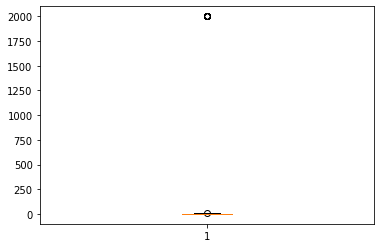

In [3]:
plt.boxplot(sneakers['total_items'])
plt.show()

The second boxplot below shows the dollar amount outliers, also with a huge outlier at around the $700000 range, but more outliers around the $10000 range.

Since we want to exclude any extreme outliers that would misrepresent the AOV, we will focus on the order_amount since there seems to have more outliers present.

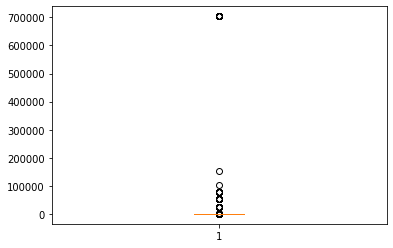

In [4]:
plt.boxplot(sneakers['order_amount'])
plt.show()

The below histograms with total_items and order_amount repeat what we have discussed regarding outliers. They are here simply to emphasize the presence of outliers in the dataset.

<AxesSubplot:>

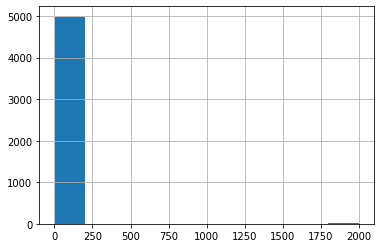

In [5]:
sneakers.total_items.hist()

<AxesSubplot:>

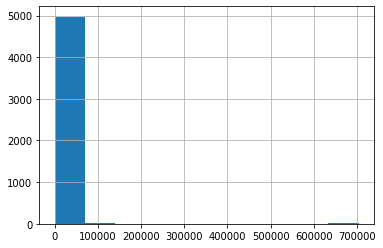

In [6]:
sneakers.order_amount.hist()

A scatterplot of order_amount and total_items below shows how much of our data is clustered except for the orders with 2000 shoes sold in one transaction.

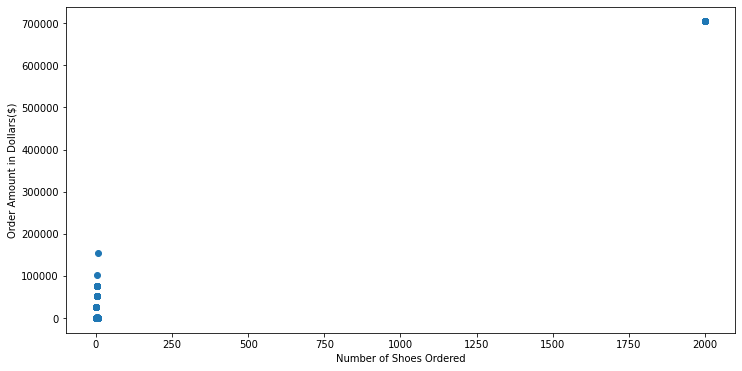

In [7]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(sneakers['total_items'], sneakers['order_amount'])
ax.set_xlabel('Number of Shoes Ordered')
ax.set_ylabel('Order Amount in Dollars($)')
plt.show()

We want to trim as little data as possible, so I calculate the 95th, 98th, and the 99th percentile of the order_amount to determine an appopriate cutoff. At the 98th percentile, the shoes are sold at \\$800.08, a much more reasonable price for shoe transactions compared to the 99th percentile, $25725.00.

In [8]:
print(sneakers['order_amount'].quantile(0.95))
print(sneakers['order_amount'].quantile(0.98))
print(sneakers['order_amount'].quantile(0.99))

640.0
800.0799999999981
25725.0


With the 98th percentile of order_amount at around \\$800, I set an index within the dataset that exceeds $1000 for order_amount. Those observations in the dataset are then dropped to be excluded as previously mentioned.

In [9]:
index = sneakers[(sneakers['order_amount'] > 1000)].index
sneakers.drop(index, inplace = True)
print(sneakers.describe())

          order_id      shop_id      user_id  order_amount  total_items
count  4929.000000  4929.000000  4929.000000   4929.000000  4929.000000
mean   2499.687158    49.856563   849.803408    301.064313     1.990667
std    1444.461268    29.083196    86.859493    156.151226     0.976133
min       1.000000     1.000000   700.000000     90.000000     1.000000
25%    1247.000000    24.000000   775.000000    163.000000     1.000000
50%    2497.000000    50.000000   850.000000    284.000000     2.000000
75%    3752.000000    74.000000   925.000000    387.000000     3.000000
max    5000.000000   100.000000   999.000000    980.000000     6.000000


We lose less than 100 observations but we have a much more accurate mean at \\$301.06 with the median relatively unchanged at $281.00

0.9724536592632975


{'whiskers': [<matplotlib.lines.Line2D at 0x21ceee70e20>,
 'caps': [<matplotlib.lines.Line2D at 0x21ceee81400>,
 'boxes': [<matplotlib.lines.Line2D at 0x21ceee70b20>],
 'medians': [<matplotlib.lines.Line2D at 0x21ceee819d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x21ceee81ca0>],
 'means': []}

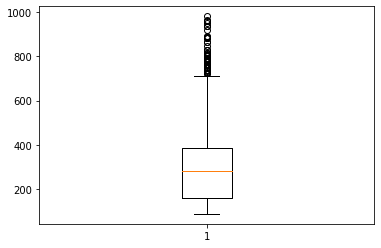

In [11]:
print(sneakers['order_amount'].skew())
plt.boxplot(sneakers['order_amount'])

## Part B

The metric I would use would still be the average of the sales data, but with the most extreme outliers removed. The Trimmed Average Order Value (TAOV) will still provide an accurate representation of the shoe sales data with losing too much data.


## Part C

The TAOV calculated by removing the top 2 percentile of order_amount is $301.06. 

# Question 2

For this question you’ll need to use SQL. Follow this link to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.

a.	How many orders were shipped by Speedy Express in total?  
b.	What is the last name of the employee with the most orders?  
c.	What product was ordered the most by customers in Germany?  


## Part A
SELECT COUNT (*) AS OrderShipped  
FROM Orders  
INNER JOIN Shippers  
ON Shippers.ShipperID = Orders.ShipperID  
WHERE ShipperName='Speedy Express'

OrderShipped
54 

## Part B

SELECT Employees.LastName, COUNT(Orders.EmployeeID) AS OrderCount  
FROM Orders  
INNER JOIN Employees ON Orders.EmployeeID = Employees.EmployeeID  
GROUP BY LastName  
ORDER BY COUNT(LastName) DESC  

Peacock

## Part C

SELECT Products.ProductName  
FROM Orders  
JOIN Customers ON Customers.CustomerID = Orders.CustomerID  
JOIN OrderDetails ON OrderDetails.OrderID = Orders.OrderID  
JOIN Products ON Products.ProductID = OrderDetails.ProductID  
WHERE Customers.Country = 'Germany'  
GROUP BY OrderDetails.ProductID  
ORDER BY ProductID DESC  

Boston Crab Meat